In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import missingno

# Data Exploration

## Look and Load

In [2]:
def load_pickle(file):
    objects = []
    with open(file, "rb") as openfile:
        u = pickle._Unpickler(openfile)
        u.encoding = 'latin1'
        df = u.load()
    return df

In [3]:
wthr_df = load_pickle("griddata_gfs_us_20180101_20190826_03_final.p")

In [4]:
wthr_df.head()

,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_%,r_pl950_%,shtfl_sfc_wm2,...,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,created_on,azimuth,elevation
index,,,,,,,,,,,,,,,,,,,,,
2018-01-01 06:00:00+00:00,0.0,16.777032,1349.927656,99212.0625,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,...,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894
2018-01-01 07:00:00+00:00,0.0,16.606744,1352.623506,99259.8125,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,...,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353
2018-01-01 08:00:00+00:00,0.0,16.750567,1385.881213,99340.0125,0.519516,0.004875,0.004601,88.350,81.475,-60.174194,...,66.846392,69.702886,73.395684,17.187174,10.191553,17.103298,22.151705,2018-01-01 00:00:00+00:00,134.513901,3.528108
2018-01-01 09:00:00+00:00,30.0,16.653720,1406.317913,99435.6875,0.462775,0.004693,0.004395,85.400,78.575,-61.376221,...,69.538877,72.116654,75.992542,16.804585,10.074198,16.507619,21.857454,2018-01-01 00:00:00+00:00,146.969666,9.473817
2018-01-01 10:00:00+00:00,70.0,16.143047,1413.328074,99523.6750,0.395166,0.004618,0.004322,85.275,78.300,-50.711792,...,67.391618,69.753380,73.848494,15.970588,9.719457,15.561127,21.082533,2018-01-01 00:00:00+00:00,160.319397,13.648098


In [5]:
max(wthr_df.index)

Timestamp('2019-08-26 18:00:00+0000', tz='UTC')

In [6]:
wthr_df.shape

(14378, 26)

In [7]:
wthr_df.describe()

,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_%,r_pl950_%,shtfl_sfc_wm2,...,wdir_100m_dn,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,azimuth,elevation
count,14378.000000,14378.000000,14378.000000,14378.000000,14378.000000,14378.000000,14378.000000,14378.000000,14378.000000,14378.000000,...,14378.000000,14378.000000,14378.000000,14378.000000,14378.000000,14378.000000,14378.000000,14378.000000,14378.000000,14378.000000
mean,155.029194,7.943250,549.354510,101512.216593,0.742688,0.006481,0.006165,75.716828,75.737091,6.316193,...,162.410028,162.399371,162.002774,154.312530,7.471580,4.409038,7.351590,10.082908,182.032028,2.355874
std,230.147722,4.061036,427.125419,996.863087,1.175120,0.002735,0.002540,18.950255,17.724822,71.012102,...,99.361734,99.942995,99.257628,98.208108,3.329532,2.078577,3.285841,5.270483,103.042725,30.472445
min,0.000000,0.517106,21.333019,97637.887500,-2.431875,0.000993,0.000939,2.400000,2.425000,-115.227905,...,1.065702,1.605544,0.878477,1.231885,0.558441,0.389727,0.515088,0.338407,8.330822,-62.201588
25%,0.000000,4.683080,199.087539,100968.224375,-0.136376,0.004248,0.004075,64.625000,64.718129,-36.246123,...,78.421911,77.080156,78.444561,75.816115,5.176560,2.884135,5.082444,6.094260,90.158264,-19.496047
50%,15.000000,7.678551,451.845422,101567.477500,0.631883,0.006143,0.005920,79.475000,78.600000,-20.870140,...,130.455007,129.200547,130.106612,123.520460,7.159732,4.032932,7.046303,9.377695,186.476692,2.363771
75%,248.750000,10.631585,821.578707,102143.115625,1.514157,0.008523,0.008049,90.793750,89.643750,24.313370,...,261.226496,259.620900,261.262503,255.757132,9.261023,5.634826,9.126081,13.150352,273.261543,24.920794
max,885.500000,24.316044,2519.267852,104261.237500,4.514006,0.016743,0.014403,100.000000,100.000000,372.421576,...,359.180650,358.364902,359.093417,359.693548,23.256653,14.571061,23.972086,30.798095,358.682526,62.103596


In [8]:
nrg_df = load_pickle("obs_20180101_20190625_03_final_normed.p")

In [9]:
nrg_df.head()

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm
2018-01-01 00:00:00+01:00,0.330269,0.450934,0.120665
2018-01-01 00:10:00+01:00,0.339204,0.457539,0.118335
2018-01-01 00:20:00+01:00,0.336993,0.456577,0.119584
2018-01-01 00:30:00+01:00,0.337858,0.462447,0.124589
2018-01-01 00:40:00+01:00,0.353646,0.483538,0.129892


In [10]:
max(nrg_df.index)

Timestamp('2019-06-25 01:50:00+0200', tz='Europe/Berlin')

In [11]:
nrg_df.shape

(70710, 3)

In [12]:
nrg_df.describe()

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm
count,70710.000000,70710.000000,70710.000000
mean,0.204310,0.274691,0.070381
std,0.162364,0.264172,0.128426
min,0.000000,0.000073,0.000049
25%,0.065503,0.074167,0.005369
50%,0.166234,0.181165,0.014100
75%,0.320650,0.391951,0.056041
max,0.801717,1.019565,0.779721


Those three values are connected. The available power is the loss plus the used power.

In [13]:
(nrg_df.target_losses_norm + nrg_df.power_mw_obsnorm) == nrg_df.power_available_mw_obsnorm

2018-01-01 00:00:00+01:00    True
2018-01-01 00:10:00+01:00    True
2018-01-01 00:20:00+01:00    True
2018-01-01 00:30:00+01:00    True
2018-01-01 00:40:00+01:00    True
                             ... 
2019-06-25 01:10:00+02:00    True
2019-06-25 01:20:00+02:00    True
2019-06-25 01:30:00+02:00    True
2019-06-25 01:40:00+02:00    True
2019-06-25 01:50:00+02:00    True
Length: 70710, dtype: bool

## Let's get plottin'

Almost every data point in nrg_df (Energy) has a data point in wthr_df (Weather), but not vice versa. I want weather data for every energy data point. These are the ones I can use for predictions. So I have to merge them.

In [14]:
print('Timestamp index: ' + str(nrg_df.index[14]))
nrg_df.index[14].hour #this way I can access the information in the index

Timestamp index: 2018-01-01 02:20:00+01:00


2

In [15]:
nrg_df['date_by_hour'] = 'NaN'
for i, row in nrg_df.iterrows(): #i is the timestamp index
    nrg_df.date_by_hour[i] = pd.datetime(i.year, 
                                      i.month, 
                                      i.day, 
                                      i.hour, 
                                      tzinfo = i.tzinfo)

C:\Users\thoma\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\thoma\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [16]:
nrg_df.date_by_hour.head(12)

2018-01-01 00:00:00+01:00    2018-01-01 00:00:00+01:00
2018-01-01 00:10:00+01:00    2018-01-01 00:00:00+01:00
2018-01-01 00:20:00+01:00    2018-01-01 00:00:00+01:00
2018-01-01 00:30:00+01:00    2018-01-01 00:00:00+01:00
2018-01-01 00:40:00+01:00    2018-01-01 00:00:00+01:00
2018-01-01 00:50:00+01:00    2018-01-01 00:00:00+01:00
2018-01-01 01:00:00+01:00    2018-01-01 01:00:00+01:00
2018-01-01 01:10:00+01:00    2018-01-01 01:00:00+01:00
2018-01-01 01:20:00+01:00    2018-01-01 01:00:00+01:00
2018-01-01 01:30:00+01:00    2018-01-01 01:00:00+01:00
2018-01-01 01:40:00+01:00    2018-01-01 01:00:00+01:00
2018-01-01 01:50:00+01:00    2018-01-01 01:00:00+01:00
Name: date_by_hour, dtype: object

In [17]:
pd.Timestamp(2019, 2, 15)

Timestamp('2019-02-15 00:00:00')

In [18]:
pd.Timestamp('2018-01-01 07:00:00+01:00') == pd.Timestamp('2018-01-01 06:00:00+00:00')

True

In [19]:
#mrgd_df = pd.concat([nrg_df.set_index('date_by_hour'), wthr_df], axis=1, join='inner')
def increment_wthr_ts(iterator):
    j, wrow = next(iterator)
    return pd.Timestamp(j), wrow

dummy_lst = [[np.nan]*26] * nrg_df.shape[0]
wthr_iterator = wthr_df.iterrows()
ts_wthr, wrow = increment_wthr_ts(wthr_iterator)

for ind, (i, row) in enumerate(nrg_df.iterrows()):
    ts_nrg = pd.Timestamp(row.date_by_hour)
    if ts_nrg > ts_wthr:
        ts_wthr, wrow = increment_wthr_ts(wthr_iterator)
    if ts_nrg == ts_wthr:
        dummy_lst[ind] = [itm for itm in wrow]
    
        

In [20]:
nrg_df.index = nrg_df.index.tz_convert(None)

In [21]:
nrg_df.head()

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm,date_by_hour
2017-12-31 23:00:00,0.330269,0.450934,0.120665,2018-01-01 00:00:00+01:00
2017-12-31 23:10:00,0.339204,0.457539,0.118335,2018-01-01 00:00:00+01:00
2017-12-31 23:20:00,0.336993,0.456577,0.119584,2018-01-01 00:00:00+01:00
2017-12-31 23:30:00,0.337858,0.462447,0.124589,2018-01-01 00:00:00+01:00
2017-12-31 23:40:00,0.353646,0.483538,0.129892,2018-01-01 00:00:00+01:00


In [22]:
mrg_df = pd.concat([nrg_df, pd.DataFrame(dummy_lst, index = nrg_df.index, columns = wthr_df.columns)],axis=1)

In [23]:
mrg_df.shape

(70710, 30)

In [24]:
mrg_df.head()

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm,date_by_hour,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,...,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,created_on,azimuth,elevation
2017-12-31 23:00:00,0.330269,0.450934,0.120665,2018-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2017-12-31 23:10:00,0.339204,0.457539,0.118335,2018-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2017-12-31 23:20:00,0.336993,0.456577,0.119584,2018-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2017-12-31 23:30:00,0.337858,0.462447,0.124589,2018-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2017-12-31 23:40:00,0.353646,0.483538,0.129892,2018-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [25]:
mrg_df.describe()

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,...,wdir_100m_dn,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,azimuth,elevation
count,70710.000000,70710.000000,70710.000000,68925.000000,68925.000000,68925.000000,68925.000000,68925.000000,68925.000000,68925.000000,...,68925.000000,68925.000000,68925.000000,68925.000000,68925.000000,68925.000000,68925.000000,68925.000000,68925.000000,68925.000000
mean,0.204310,0.274691,0.070381,148.898767,8.063103,552.311393,101512.096078,0.759712,0.006147,0.005860,...,166.640849,166.695903,166.148601,158.757565,7.572002,4.439478,7.445676,10.240085,182.913421,1.013614
std,0.162364,0.264172,0.128426,226.650632,4.164345,432.872553,1019.535638,1.178976,0.002617,0.002450,...,100.403009,100.944043,100.353294,100.033029,3.427723,2.125421,3.384758,5.418360,102.386614,30.425721
min,0.000000,0.000073,0.000049,0.000000,0.517106,21.333019,97637.887500,-2.431875,0.000993,0.000939,...,1.065702,1.605544,0.878477,1.231885,0.558441,0.389727,0.515088,0.338407,8.330822,-62.201588
25%,0.065503,0.074167,0.005369,0.000000,4.714689,197.444200,100930.025000,-0.095727,0.004048,0.003888,...,78.666833,77.181492,78.572592,76.467012,5.213719,2.883513,5.116174,6.147295,92.030838,-21.149464
50%,0.166234,0.181165,0.014100,12.500000,7.749561,449.104587,101579.350000,0.653383,0.005738,0.005536,...,137.023969,137.686530,136.378568,127.371959,7.207236,4.038870,7.079815,9.424974,187.055878,1.115567
75%,0.320650,0.391951,0.056041,231.500000,10.877142,832.442883,102154.960000,1.517620,0.008019,0.007608,...,263.553165,261.993699,263.640717,262.411752,9.406372,5.686764,9.262976,13.485638,273.092102,23.550364
max,0.801717,1.019565,0.779721,885.500000,24.316044,2519.267852,104261.237500,4.316991,0.015260,0.013631,...,359.180650,358.364902,359.093417,359.606116,23.256653,14.571061,23.972086,30.798095,358.682526,62.103596


Oh no, zeros! We have to clean that! 
For some energy values we do not have predictions, so we throw them away.

In [26]:
mrg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70710 entries, 2017-12-31 23:00:00 to 2019-06-24 23:50:00
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   power_mw_obsnorm            70710 non-null  float64            
 1   power_available_mw_obsnorm  70710 non-null  float64            
 2   target_losses_norm          70710 non-null  float64            
 3   date_by_hour                70710 non-null  object             
 4   dswrf_sfc_wm2               68925 non-null  float64            
 5   gust_sfc_ms                 68925 non-null  float64            
 6   hpbl_sfc_m                  68925 non-null  float64            
 7   msl_ms_pa                   68925 non-null  float64            
 8   pottemp_80mto0m_K           68925 non-null  float64            
 9   q_2m_1                      68925 non-null  float64            
 10  q_pfg30_1              

In [27]:
clean_df = mrg_df[mrg_df.azimuth.isnull() == False].copy()

In [28]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68925 entries, 2018-01-01 06:00:00 to 2019-06-24 23:50:00
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   power_mw_obsnorm            68925 non-null  float64            
 1   power_available_mw_obsnorm  68925 non-null  float64            
 2   target_losses_norm          68925 non-null  float64            
 3   date_by_hour                68925 non-null  object             
 4   dswrf_sfc_wm2               68925 non-null  float64            
 5   gust_sfc_ms                 68925 non-null  float64            
 6   hpbl_sfc_m                  68925 non-null  float64            
 7   msl_ms_pa                   68925 non-null  float64            
 8   pottemp_80mto0m_K           68925 non-null  float64            
 9   q_2m_1                      68925 non-null  float64            
 10  q_pfg30_1              

Finally time to plot something!

For easier access, I will create list with column names. The three energy column names wil get on list, because we want to predict these. Another list will contain all numerical values from the weather predicitons.

In [29]:
nrg_columns = list(nrg_df.columns.drop('date_by_hour')) # sinister, evil guy voice: "date_by_hour has outlived its usefulness. Drop it!

In [30]:
nrg_columns

['power_mw_obsnorm', 'power_available_mw_obsnorm', 'target_losses_norm']

In [31]:
wthr_columns = clean_df.select_dtypes(include=np.number).columns.tolist()

In [32]:
wthr_columns = wthr_columns[3:]
wthr_columns

['dswrf_sfc_wm2',
 'gust_sfc_ms',
 'hpbl_sfc_m',
 'msl_ms_pa',
 'pottemp_80mto0m_K',
 'q_2m_1',
 'q_pfg30_1',
 'r_pl925_%',
 'r_pl950_%',
 'shtfl_sfc_wm2',
 't_100m_k',
 't_2m_k',
 't_pfg30_k',
 'tcclow_sfc_%',
 'tccmedium_sfc_%',
 'wdir_100m_dn',
 'wdir_10m_dn',
 'wdir_pfg30_dn',
 'wdir_pl925_dn',
 'wsp_100m_ms',
 'wsp_10m_ms',
 'wsp_pfg30_ms',
 'wsp_pl925_ms',
 'azimuth',
 'elevation']

In [33]:
len(wthr_columns)

25

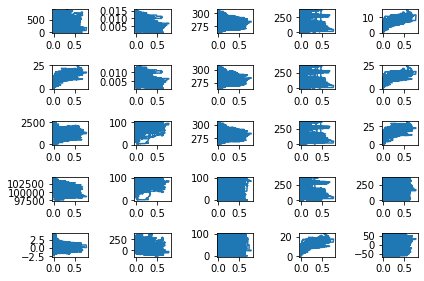

In [34]:
figure, axes = plt.subplots(nrows = 5, ncols = 5)

for i, title in enumerate(wthr_columns):
    axes[i%5][int(i/5)].plot(clean_df.target_losses_norm, clean_df[title])

figure.tight_layout()

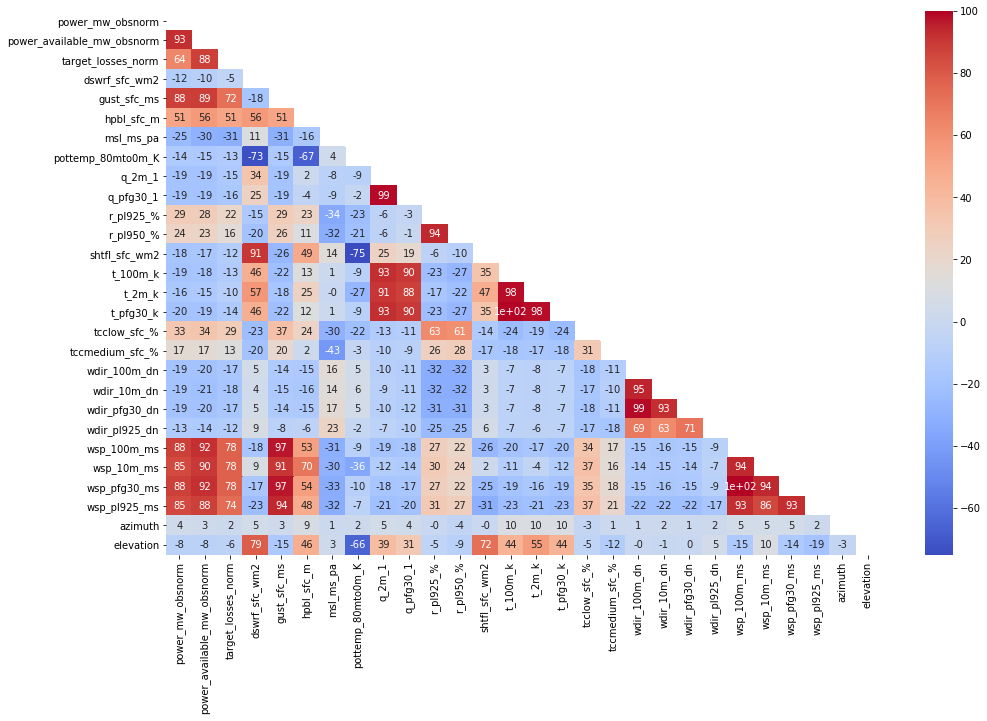

In [35]:
mask = np.triu(clean_df.corr())
plt.figure(figsize = (16,10))
ax = sns.heatmap(round(clean_df.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')



In [36]:
# _ =sns.pairplot(clean_df)
# plt.savefig('figures/pairplot.png')

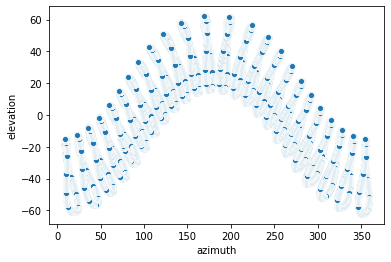

In [37]:
sns.scatterplot(clean_df.azimuth, clean_df.elevation)
plt.savefig('figures/azimut.png')

So I guess [azimuth and elevation](https://en.wikipedia.org/wiki/Azimuth "Wikipedia") are correlated in a special way... (in the link, elevation is altitude)

Anyway, for prediction only the correlations in the firs three rows matter.

## Looking at the energy levels

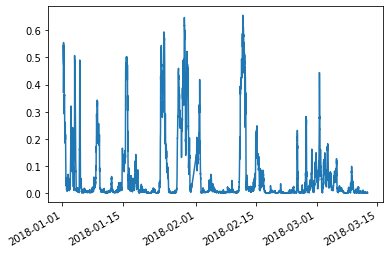

In [38]:
clean_df[:10000].target_losses_norm.plot()

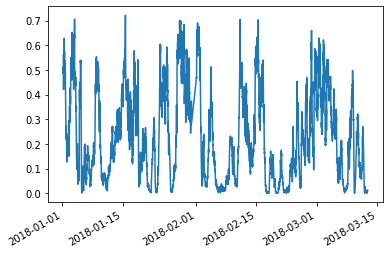

In [39]:
clean_df[:10000].power_mw_obsnorm.plot()

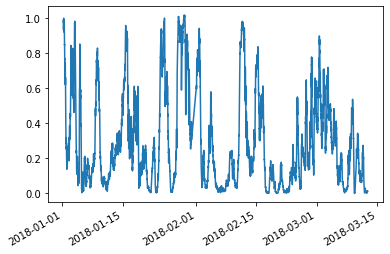

In [40]:
clean_df[:10000].power_available_mw_obsnorm.plot()

In [41]:
max(nrg_df.target_losses_norm)

0.7797212303721229

In [42]:
loss_above_p = {}
max_loss = max(nrg_df.target_losses_norm)
for p in range(0, 100):
    loss_above_p[p] = nrg_df[nrg_df.target_losses_norm >= max_loss * p /100].shape[0]

What percentage of the maximum loss work does occur how often?

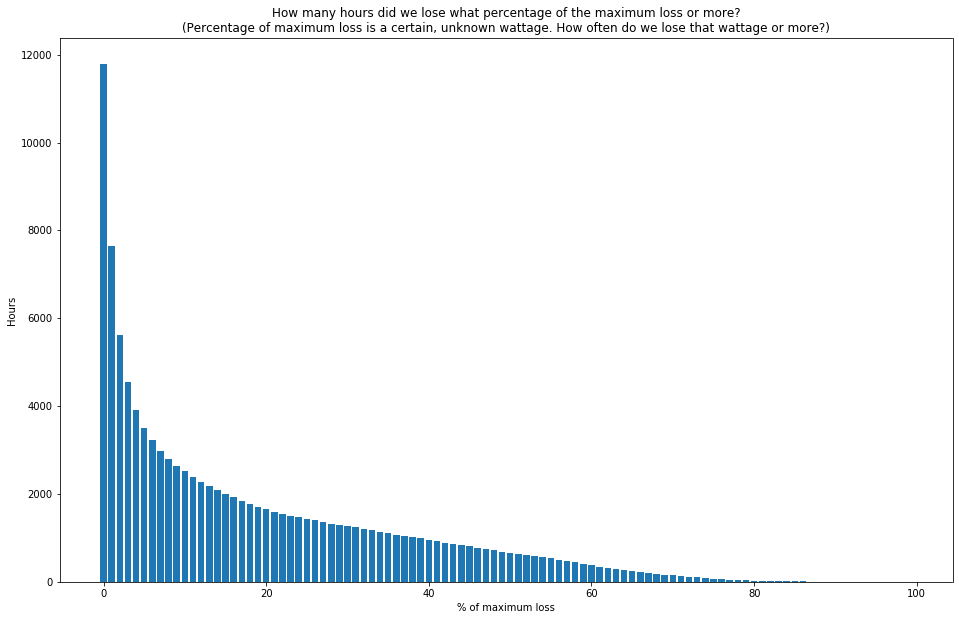

In [43]:
loss_above_p_hours = {k: v/6 for k,v in enumerate(loss_above_p.values())}
plt.figure(figsize = (16,10))
plt.bar(loss_above_p.keys(), loss_above_p_hours.values())
plt.ylabel('Hours')
plt.xlabel('% of maximum loss')
plt.title('How many hours did we lose what percentage of the maximum loss or more?\n(Percentage of maximum loss is a certain, unknown wattage. How often do we lose that wattage or more?)')

plt.savefig('figures/work_hours_over_p_of_loss')

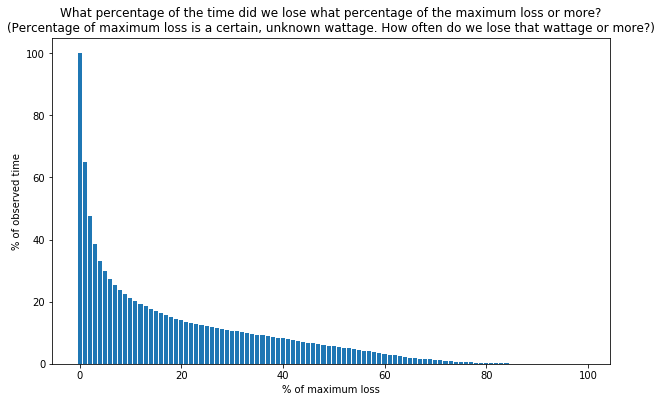

In [53]:
loss_above_p_ratio = {k: v*100/nrg_df.shape[0] for k,v in enumerate(loss_above_p.values())}
plt.figure(figsize = (10,6))
plt.bar(loss_above_p.keys(), loss_above_p_ratio.values())
plt.ylabel('% of observed time')
plt.xlabel('% of maximum loss')
plt.title('What percentage of the time did we lose what percentage of the maximum loss or more?\n(Percentage of maximum loss is a certain, unknown wattage. How often do we lose that wattage or more?)')

plt.savefig('figures/percent_of_time_over_p_of_loss')

In [45]:
max(nrg_df.power_mw_obsnorm)

0.8017171066752521

In [46]:
used_above_p_ratio = {}
max_use = max(nrg_df.power_mw_obsnorm)
occupation = (nrg_df.power_available_mw_obsnorm >= nrg_df.power_mw_obsnorm)
for p in range(0, 100):
    in_range = (nrg_df.power_mw_obsnorm >= max_use * p /100)
    used_above_p_ratio[p] = nrg_df[[rb and ob for rb, ob in zip(in_range, occupation)]].shape[0]*100/nrg_df.shape[0]

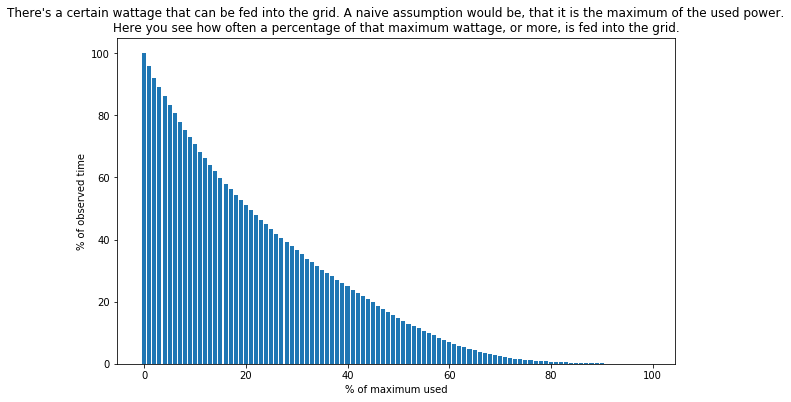

In [52]:
plt.figure(figsize = (10,6))
plt.bar(used_above_p_ratio.keys(), used_above_p_ratio.values())
plt.ylabel('% of observed time')
plt.xlabel('% of maximum used')
plt.title('There\'s a certain wattage that can be fed into the grid. A naive assumption would be, that it is the maximum of the used power.\nHere you see how often a percentage of that maximum wattage, or more, is fed into the grid.')

plt.savefig('figures/percent_of_time_over_percent_of_used')

So how many batteries do I install? Well, it's not that easy.  
Why do you want batteries? So you can save loss energy for later! But batteries don't save Watts, they save Watt\*hours. So if you have a long time with high loss your batteries will be full. And what if the next high loss period begins before your battery is depleted? For that, we have to look at the time line and simulate real batteries.  
We will do that, but first let's get a simpler model: Hydrogen production! Given unlimited storage for hydrogen, a hydrogen plant could, at any given moment take the maximum work it is laid out for. Even though technically complicated, it makes for an easier model.

In [66]:
used_p_ratio = dict(enumerate(np.diff(list(used_above_p_ratio.values()))*(-1)))

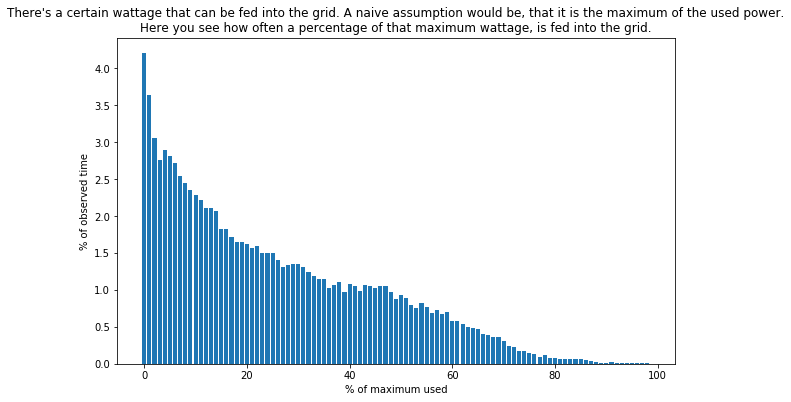

In [68]:
plt.figure(figsize = (10,6))
plt.bar(used_p_ratio.keys(), used_p_ratio.values())
plt.ylabel('% of observed time')
plt.xlabel('% of maximum used')
plt.title('There\'s a certain wattage that can be fed into the grid. A naive assumption would be, that it is the maximum of the used power.\nHere you see how often a percentage of that maximum wattage, is fed into the grid.')

plt.savefig('figures/percent_of_time_over_percent_of_used')

In [ ]:
def bat_sim(loss_ts):
    '''
    No pun intended. This simulates batterries.
    
    In: 
    loss_ts: time series with loss energy
    b: battery capacity in percentage of maximum value in loss_ts
    c: consumption in percent of maximum value in loss_ts, how moch work can be used at any given time
    
    Out:
    list of percentages representing battery charge
    list of percentages at what capacity the consumption could be fulfilled (If you have more loss energy than consumption it will be 100%)
    
    '''
    

# Creating a Model